# Titanic Ship Case Study
### by- Suryakant Patwardhan (20BCE10783)
**Problem Description:** On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not.
enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

The problem associated with the Titanic dataset is to predict whether a passenger survived the
disaster or not. The dataset contains various features such as passenger class, age, gender,
cabin, fare, and whether the passenger had any siblings or spouses on board. These features can
be used to build a predictive model to determine the likelihood of a passenger surviving the
disaster. The dataset offers opportunities for feature engineering, data visualization, and model
selection, making it a valuable resource for developing and testing data analysis and machine
learning skills.

Perform Below Tasks to complete the assignment:-
1. Download the dataset: [Dataset](https://drive.google.com/file/d/190t0KiKqSdbFl-o_6r3S9Tvwo2mHzrcB/view)
2. Load the dataset.
3. Perform Below Visualizations.
  - Univariate Analysis
  - Bi - Variate Analysis
  - Multi - Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Handle the Missing values.
6. Find the outliers and replace the outliers
7. Check for Categorical columns and perform encoding.
8. Split the data into dependent and independent variables.
9. Scale the independent variables
10. Split the data into training and testing

In [ ]:
# completes tasks (1) and (2)
import pandas as pd

link_to_dataset='https://drive.google.com/file/d/190t0KiKqSdbFl-o_6r3S9Tvwo2mHzrcB/view'
url='https://drive.google.com/uc?id=' + link_to_dataset.split('/')[-2] # extracts `file id` from `drive link`
df = pd.read_csv(url)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


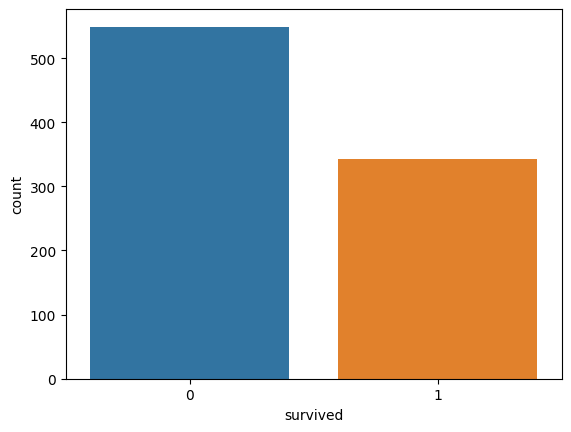

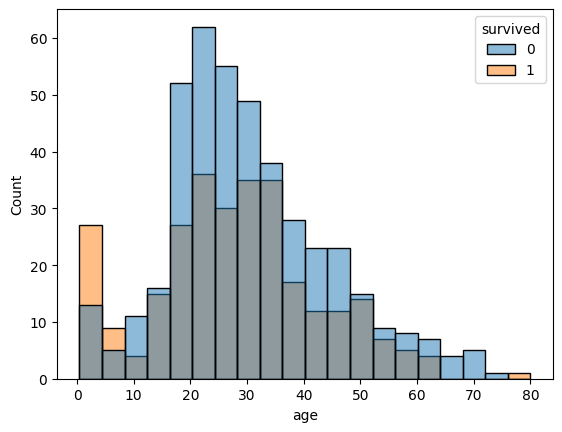

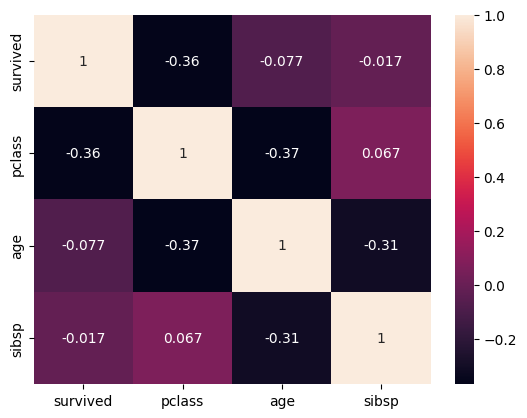

In [ ]:
# step 3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# univariate
sns.countplot(data=df, x='survived')
plt.show()

# bivariate
sns.histplot(data=df, x='age', hue='survived')
plt.show()

# multivariate
def is_numeric(val):
  try:
    float(val)
    return True
  except ValueError:
    return False
corr = (
      df.loc[:, ['survived', 'pclass', 'age', 'sibsp']]
        .applymap(lambda v: float(v) if is_numeric(v) else np.nan)
        .dropna()
    ).corr()
sns.heatmap(corr, annot=True)
plt.show()

### step 4: Descriptive stats on data

In [ ]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# removing useless columns
df.drop(['who', 'alone', 'alive'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton


In [ ]:
print(df.nunique())
for col in ['survived', 'pclass', 'sex']:
    print(df[col].unique())

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
adult_male       2
deck             7
embark_town      3
dtype: int64
[0 1]
[3 1 2]
['male' 'female']


In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
adult_male       0
deck           688
embark_town      2
dtype: int64

In [ ]:
# handle missing values
mean_age = round(df['age'].mean(), 1)
df['age'].fillna(mean_age, inplace=True)
print(mean_age)

mode_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(mode_embarked, inplace=True)
print(mode_embarked)

mode_embark = df['embark_town'].mode()[0]
df['embark_town'].fillna(mode_embarked, inplace=True)
print(mode_embark)

mode_deck = df['deck'].mode()[0]
df['deck'].fillna(mode_deck, inplace=True)
print(mode_deck)

29.7
S
Southampton
C


In [ ]:
# handling outliers
def replace_outliers(df, column_name, z_thresh=3):
  ''' replaces outliers from numerical columns of the specified dataset '''
  median = df[column_name].median()
  std = df[column_name].std()
  outliers = (df[column_name] - median).abs() > z_thresh * std
  df[column_name][outliers] = np.nan
  df[column_name].fillna(median, inplace=True)

# numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
numeric_cols = ['age', 'fare']

for val in numeric_cols:
  replace_outliers(df, val)

df.describe(include='all')

<ipython-input-8-46b4cd7117e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][outliers] = np.nan
<ipython-input-8-46b4cd7117e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][outliers] = np.nan


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2,7,4
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,True,C,Southampton
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537,747,644
mean,0.383838,2.308642,NaN,29.364164,0.523008,0.381594,25.921479,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,12.431356,1.102743,0.806057,28.325995,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,29.700000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,29.125000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# perform encoding on categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['sex', 'embarked', 'class', 'embark_town', 'adult_male']
for col in cat_cols:
  df[col] = le.fit_transform(df[col])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town
0,0,3,1,22.0,1,0,7.2500,2,2,1,C,3
1,1,1,0,38.0,1,0,71.2833,0,0,0,C,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,C,3
3,1,1,0,35.0,1,0,53.1000,2,0,0,C,3
4,0,3,1,35.0,0,0,8.0500,2,2,1,C,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,C,3
887,1,1,0,19.0,0,0,30.0000,2,0,0,B,3
888,0,3,0,29.7,1,2,23.4500,2,2,0,C,3
889,1,1,1,26.0,0,0,30.0000,0,0,1,C,0


In [ ]:
df['survived'] = df['survived'].astype('uint8')
df['age'] = df['age'].astype('uint32')
df['pclass'] = df['pclass'].astype('uint8')
df['sibsp'] = df['sibsp'].astype('uint32')
df['parch'] = df['parch'].astype('uint32')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town
0,0,3,1,22,1,0,7.2500,2,2,1,C,3
1,1,1,0,38,1,0,71.2833,0,0,0,C,0
2,1,3,0,26,0,0,7.9250,2,2,0,C,3
3,1,1,0,35,1,0,53.1000,2,0,0,C,3
4,0,3,1,35,0,0,8.0500,2,2,1,C,3


In [ ]:
# split dataset into independent and dependent variables
X = df.iloc[:, 1:-1]
y = df.iloc[:, 0]

In [ ]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck
0,3,1,22,1,0,7.2500,2,2,1,C
1,1,0,38,1,0,71.2833,0,0,0,C
2,3,0,26,0,0,7.9250,2,2,0,C
3,1,0,35,1,0,53.1000,2,0,0,C
4,3,1,35,0,0,8.0500,2,2,1,C


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: uint8

In [ ]:
# Scale the independent variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['fare'] = scaler.fit_transform(df[['fare']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town
0,0,3,1,-0.579387,1,0,-0.659534,2,2,1,C,3
1,1,1,0,0.707378,1,0,1.602320,0,0,0,C,0
2,1,3,0,-0.257696,0,0,-0.635691,2,2,0,C,3
3,1,1,0,0.466109,1,0,0.960029,2,0,0,C,3
4,0,3,1,0.466109,0,0,-0.631276,2,2,1,C,3


In [ ]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)

(668, 10)
(223, 10)
